In [1]:
%pylab inline
# from joblib import Parallel, delayed
import multiprocessing as mp
import matplotlib.pyplot as plt

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import multiprocessing as mp
from multiprocessing import Pool, Value, Array
import time
from numba import njit

m_set = []

Populating the interactive namespace from numpy and matplotlib


In [2]:
def mandelbrot_process(c, boundary=2, max_iterations=256):
    z = 0+0j
    i = 0
    while absolute(z) < absolute(boundary):
#         if i%20 == 0:
#             print('i:',i,'z:',z)
        if i == max_iterations:
            break
        z = z*z + c
        i += 1
    return i

In [3]:
# def create_arange(start, end, step):
#     my_arange = []
#     my_arange.append([start, start+(end-start)/4, step])
#     new_start = start+(end-start)/4
#     my_arange.append([new_start, new_start+(end-start)/4, step])
#     newer_start = new_start+(end-start)/4
#     my_arange.append([newer_start, newer_start+(end-start)/4, step])
#     newest_start = newer_start+(end-start)/4
#     my_arange.append([newest_start, newest_start+(end-start)/4, step])
#     new_5 = newest_start+(end-start)/4
#     my_arange.append([new_5])
#     return my_arange

In [4]:
def mandelbrot(my_arange):
    start = my_arange[0]
    end = my_arange[1]
    step = my_arange[2]
    for i in arange(start, end, step):
        for j in arange(-2.0, 2.0, 0.001):
            iters = mandelbrot_process(complex(i,j))
            if int(iters):
                m_set.append((i,j, iters))
    return m_set

In [5]:
# my_arange = create_arange(-2.0, 2.0, 0.005)
step = 0.001
my_arange = [[-2.0, -1.75, step], [-1.75, -1.5, step], 
             [-1.5, -1.25, step], [-1.25, -1.0, step], 
             [-1.0, -0.75, step], [-0.75, -0.5, step], 
             [-0.5, -0.25, step], [-0.25, 0.0, step], 
             [0.0, 0.25, step], [0.25, 0.5, step],  
             [0.5, 0.75, step], [0.75, 1.0, step], 
             [1.0, 1.25, step], [1.25, 1.5, step],  
             [1.5, 1.75, step], [1.75, 2.0, step],]

In [6]:
pool = mp.Pool()

In [7]:
# %%time
res = pool.map(mandelbrot, my_arange)

In [8]:
m_set = []
for i in range(len(res)):
    for j in range(len(res[i])):
        m_set.append(res[i][j])
len(m_set)

16000000

In [9]:
m_set[0]

(-2.0, -2.0, 1)

In [10]:
labels = []
x_vals = []
y_vals = []

for point in m_set:
#     print(point)
    labels.append(point[2])
    x_vals.append(point[0])
    y_vals.append(point[1])

labels = np.array(labels)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

In [12]:
# colors = cm.rainbow(colors)
c_array = {}

for i in range(len(labels)):
    c_array[labels[i]] = "#"+''.join([random.choice(['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']) for j in range(6)])

No handles with labels found to put in legend.


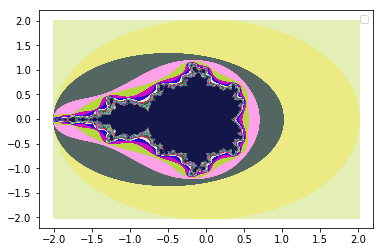

In [13]:
fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(x_vals[ix], y_vals[ix], c = c_array[g], s = 1)
ax.legend()
plt.show()

In [ ]:
# plt.scatter(*zip(*m_set))